# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [637]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
pymaceuticals_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [639]:
# Checking the number of mice.
mice_count = len(mouse_metadata["Mouse ID"].unique())
print(mice_count)

249


In [641]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = pymaceuticals_data[pymaceuticals_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice_ids = duplicated_mice["Mouse ID"].unique()
print(duplicated_mice_ids)

['g989']


In [643]:
# Optional: Get all the data for the duplicate mouse ID.
Total_duplicate_data = pymaceuticals_data[pymaceuticals_data["Mouse ID"].isin(duplicated_mice_ids)]

print(Total_duplicate_data.head())

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107     g989          0           45.000000                 0     Propriva   
137     g989          0           45.000000                 0     Propriva   
329     g989          5           48.786801                 0     Propriva   
360     g989          5           47.570392                 0     Propriva   
620     g989         10           51.745156                 0     Propriva   

        Sex  Age_months  Weight (g)  
107  Female          21          26  
137  Female          21          26  
329  Female          21          26  
360  Female          21          26  
620  Female          21          26  


In [645]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pymaceuticals_data = pymaceuticals_data[~pymaceuticals_data["Mouse ID"].isin(duplicated_mice_ids)]

#Display the clean DataFrame
print(clean_pymaceuticals_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [647]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_pymaceuticals_data["Mouse ID"].unique())
print(clean_mice_count)

248


## Summary Statistics

In [650]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean_tumor = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({
    "Mean": mean_tumor,
    "Median": median_tumor,
    "Variance": variance_tumor,
    "Standard Deviation": std_tumor,
    "SEM": sem_tumor
})

# Display the stats summary 
print(stats_summary)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [652]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary = clean_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean_tumor="mean",
    median_tumor="median",
    variance_tumor="var",
    std_tumor="std",
    sem_tumor="sem"
)

## Bar and Pie Charts

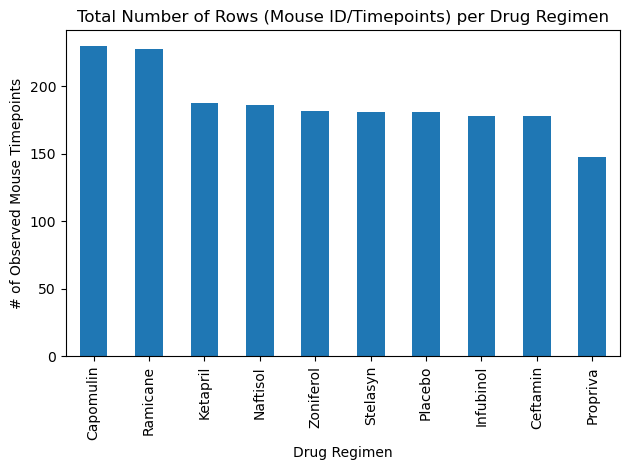

In [655]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen 
drug_regimen_stats = clean_pymaceuticals_data["Drug Regimen"].value_counts()

# Set x-axis and tick locations
x_axis = np.arange(len(drug_regimen_stats))
tick_locations = [value for value in x_axis]

# Generate a bar plot
drug_regimen_stats.plot(kind="bar", title="Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints") 
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


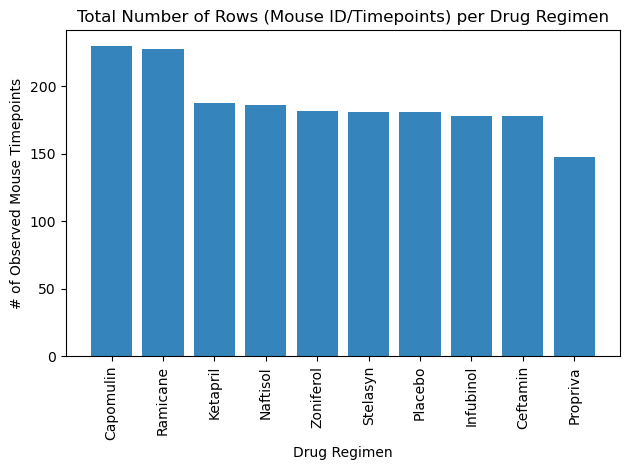

In [657]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen 
drug_regimen_stats = clean_pymaceuticals_data["Drug Regimen"].value_counts()

# Set x-axis and tick locations
x_axis = np.arange(len(drug_regimen_stats))
tick_locations = [value for value in x_axis]

# Set x-axis and tick locations
x_axis = np.arange(len(drug_regimen_stats))
tick_locations = [value for value in x_axis]

# Generate a bar plot
plt.bar(x_axis, drug_regimen_stats.values, alpha=0.90, align="center")
plt.xticks(tick_locations, drug_regimen_stats.index, rotation="vertical")  # Rotate x-axis labels for better readability
plt.title("Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.tight_layout()

# Display the plot
plt.show()

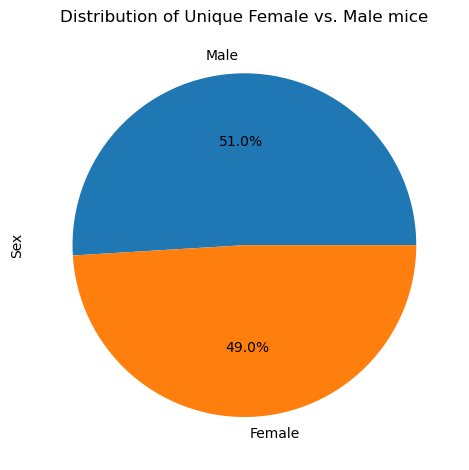

In [665]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
import pandas as pd

# Get the unique mice with their gender
gender_distribution = clean_pymaceuticals_data["Sex"].value_counts()

# Generate a pie chart
gender_distribution.plot(kind="pie", title="Distribution of Unique Female vs. Male mice", autopct="%1.1f%%", ylabel="Sex")

plt.tight_layout()

# Make the pie chart
plt.show()

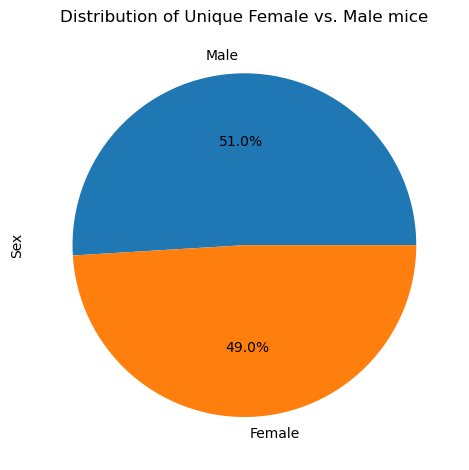

In [663]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

# Get the unique mice with their gender
gender_distribution = clean_pymaceuticals_data["Sex"].value_counts()

# Generate a pie chart
plt.pie(gender_distribution.values, autopct="%1.1f%%", labels=gender_distribution.index.values)
plt.title("Distribution of Unique Female vs. Male mice")
plt.ylabel("Sex")
plt.tight_layout()

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [608]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen = clean_pymaceuticals_data[
    clean_pymaceuticals_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
]
# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = treatment_regimen.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_greatest_timepoint, treatment_regimen, on=["Mouse ID", "Timepoint"], how="left")

#Display the DataFrame
print(final_tumor_volume.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a275         45           62.999356                 3     Ceftamin   
3     a411         45           38.407618                 1     Ramicane   
4     a444         45           43.047543                 0     Ramicane   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          20          28  
3    Male           3          22  
4  Female          10          25  


In [610]:
# Put treatments into a list for the loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter tumor volume data for the current treatment
    treatment_regimen = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_regimen.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_regimen[(treatment_regimen < lower_bound) | (treatment_regimen > upper_bound)]

    # Add the tumor volume data for the current treatment to the list
    tumor_vol_data.append(treatment_regimen)

    # Print the results for the current treatment
    print(f"Tumor volume data for {treatment} added. Current data size: {len(tumor_vol_data)}")
    print(f"{treatment}'s potential outliers: {outliers}")



Tumor volume data for Capomulin added. Current data size: 1
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Tumor volume data for Ramicane added. Current data size: 2
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Tumor volume data for Infubinol added. Current data size: 3
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Tumor volume data for Ceftamin added. Current data size: 4
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


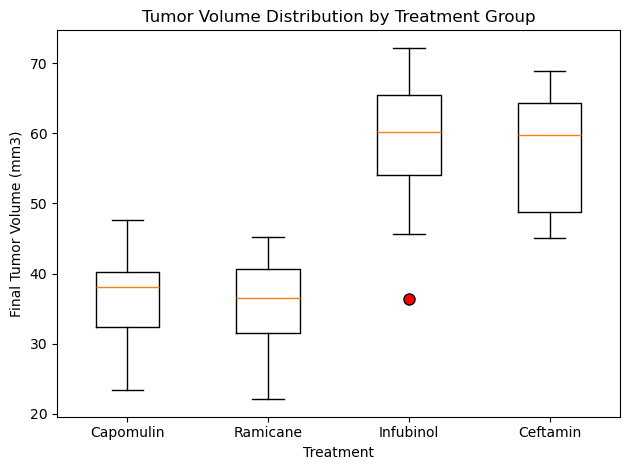

In [612]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(
    tumor_vol_data, 
    tick_labels=treatments,
    flierprops={"marker": "o", "markersize": 8, "markerfacecolor": "red"}
)

# Add labels and title
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")

# Display the box plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

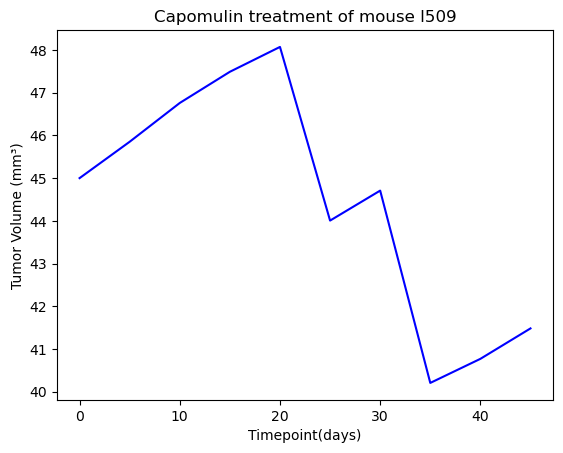

In [615]:
import matplotlib.pyplot as plt

# Filter the data for Capomulin regimen
capomulin_data = clean_pymaceuticals_data[clean_pymaceuticals_data["Drug Regimen"] == "Capomulin"]

# Select data for the specific mouse ID
single_mouse_id = "l509"
single_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']

# Generate the line plot
single_mouse_id = plt.plot(
    single_mouse_data["Timepoint"],
    single_mouse_data["Tumor Volume (mm3)"],  
    color="blue"
)

# Add labels and title
plt.title(f"Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm³)")


# Display the plot
plt.show()


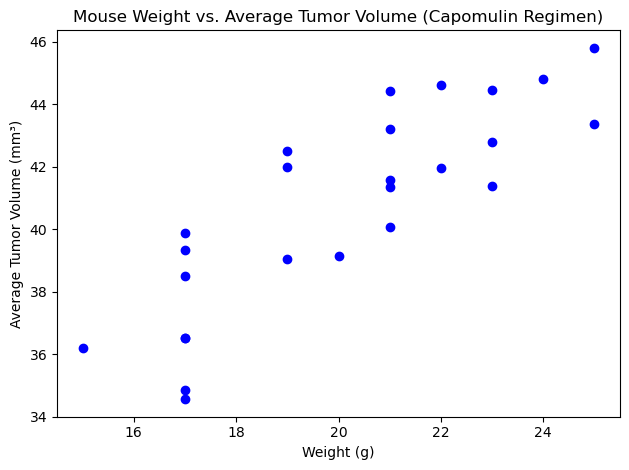

In [617]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_pymaceuticals_data[clean_pymaceuticals_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the weight of each mouse
merged_data = pd.merge(average_tumor_volume, capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")

#Disply the plot
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
y = 0.95x + 21.55


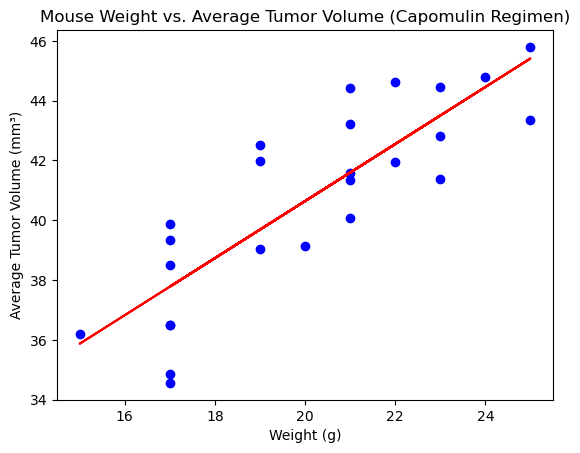

In [629]:

#Define the x and y labels
x = merged_data["Weight (g)"]
y = merged_data["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation, p_value_corr = pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

# Perform linear regression (y = mx + b)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# make the equation for the line of best fit
lineEq = f"y = {slope:.2f}x + {intercept:.2f}"
print(lineEq)

# Display the scatter plot
plt.plot(x, regression_line, color="red")
plt.scatter(x, y, color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm³)")
plt.show()
